# Customers Segmentation

# 1.1 Introduction
* Clustering algorithms to group the customers.

## 1.1.1 Defining the Problem

* A Supermarket mall owner wants to identify taarget customers so that the sense can be given to marketing team and plan the strategy accordingly.

## 1.1.2 Context

* A supermarket mall owner, through membership cards , have some basic data about the customers like Customer ID, age, gender, annual income and spending score.Spending Score is  assigned to the customer based on your defined parameters like customer behavior and purchasing data. 

## 1.1.3 Experimental Design
1. Importing Libraries and Data
2. Data Cleaning
3. Exploratory Data Analysis
4. Clustering: Kmeans & Hierachical Clustering
5. Conclusion

## 1.1.4 Appropriateness of Data

*  Dataset link: [link text](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
* The features in the data include:
 
      * ID 
      * Age 
      * Gender 
      * Income 
      * Spending score
 
  

      

# 1.2 Importing Libraries

In [ ]:
# Importing libraries necessary
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from io import StringIO
import requests

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 

# 1.3 Loading Data

In [ ]:
# Creating a function to read a csv file shared via google drive

def read_google_csv(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  csv_raw = requests.get(url).text
  csv = StringIO(csv_raw)
  return csv


In [ ]:
# Loading the data
df = pd.read_csv(read_google_csv('https://drive.google.com/file/d/1Oh2tSVRMvtghP-c6aDzQLULt4-huu8w6/view?usp=sharing'))

In [ ]:
# Viewing the top five observations
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#  Viewing the last 5 observations
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# Checking the number of rows and columns in our dataset.
df.shape

(200, 5)

In [ ]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* This dataset has 200 rows and 5 columns.
* There are two data types in the dataset: Integer, and strings.

In [ ]:
# Computing summary statistics of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* The mean Income for the customers is 60.56 units.
* The max income for the customers is 137 units while the mini is 15 units.

* The average age of the mall customers is 38 years.
* The minimum age of the customers is 18 while max is 70 years.

* The mean spending score is about 50.
* The least spending score is 1 while the largest is 100.

# 1.4 Data Cleaning

## Missing values

In [ ]:
# Checking for missing values by columns
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* Yeee! we have no missing data in the dataset.

## Duplicated

In [ ]:
# check for duplicates in the dataset
df.duplicated().sum()

0

* This dataset has no duplicates.

## Renaming columns


In [ ]:
# Changing the columns no lowercase and removing space by replacing with an underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# Renaming columns
df.columns = ['customerid', 'gender', 'age', 'annual_income', 'spending_score']

In [ ]:
# Checking the column names.
df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

## Dropping unnecessary columns

In [ ]:
# Dropping unnecessary column 
# It has no useful information

df.drop('customerid', axis = 1, inplace = True)

## Data Types

In [ ]:
# grouping columns by data types

num_cols = ['age', 'annual_income','spending_score']
cat_cols = ['gender']

for i in cat_cols:
  df[i]= df[i].astype('category')

In [ ]:
#  confirming changes
df.dtypes

gender            category
age                  int64
annual_income        int64
spending_score       int64
dtype: object

In [ ]:
# Checking for unique values in the categorical columns
for col in cat_cols:
  print(col)
  print(df[col].unique())
  print(df[col].nunique())
  print('\n')

gender
[Male, Female]
Categories (2, object): [Male, Female]
2




## Outliers : Boxplots

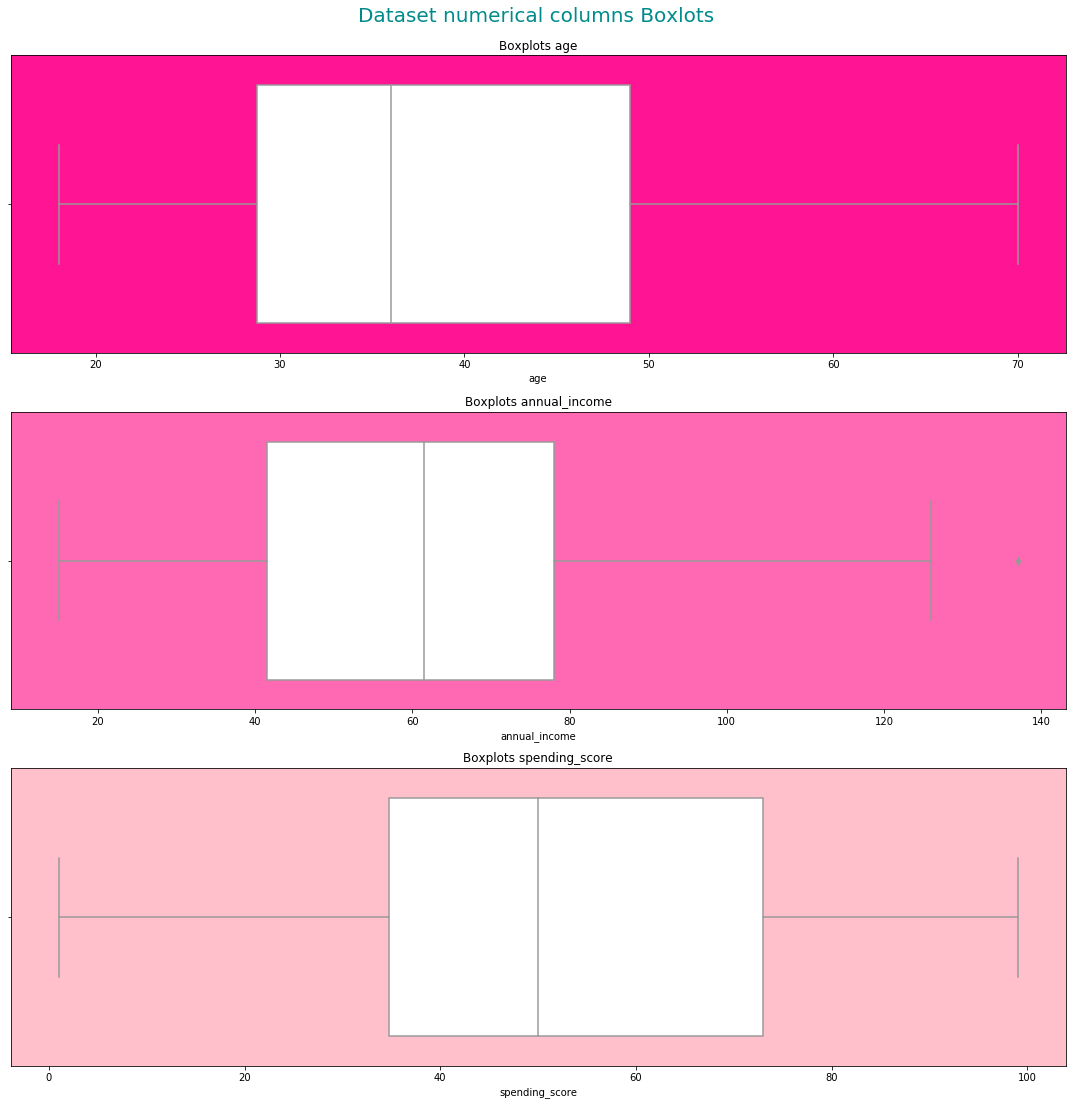

In [ ]:
# Using boxplots to check for outliers
# Using subplots to plot mutiple boxplots

# Specifying colors to use
colors = ['deeppink', 'hotpink', 'pink']

# Figure specifications
fig, axes = plt.subplots(nrows = 3, ncols =1, figsize = (15,15))

# Giving a title to the overall chart
fig.suptitle('Dataset numerical columns Boxlots', y = 1.02, color = 'darkcyan', fontsize = 20)

# Using a for loop to iterate through the list of numerical columns and plotting boxplots for each
for ax, data, name, color in zip(axes.flatten(),df, df[num_cols], colors):
  sns.boxplot(df[name], ax = ax, color = 'white')
  ax.set_title('Boxplots ' + name)
  ax.set_facecolor(color)
  plt.tight_layout()

* There is only one outlier which we will not remove.
* We shall investigate it in the analysis.

# 1.5 Exploratory Data Analysis

## 1.5.1 Univariate Analysis

### Histograms

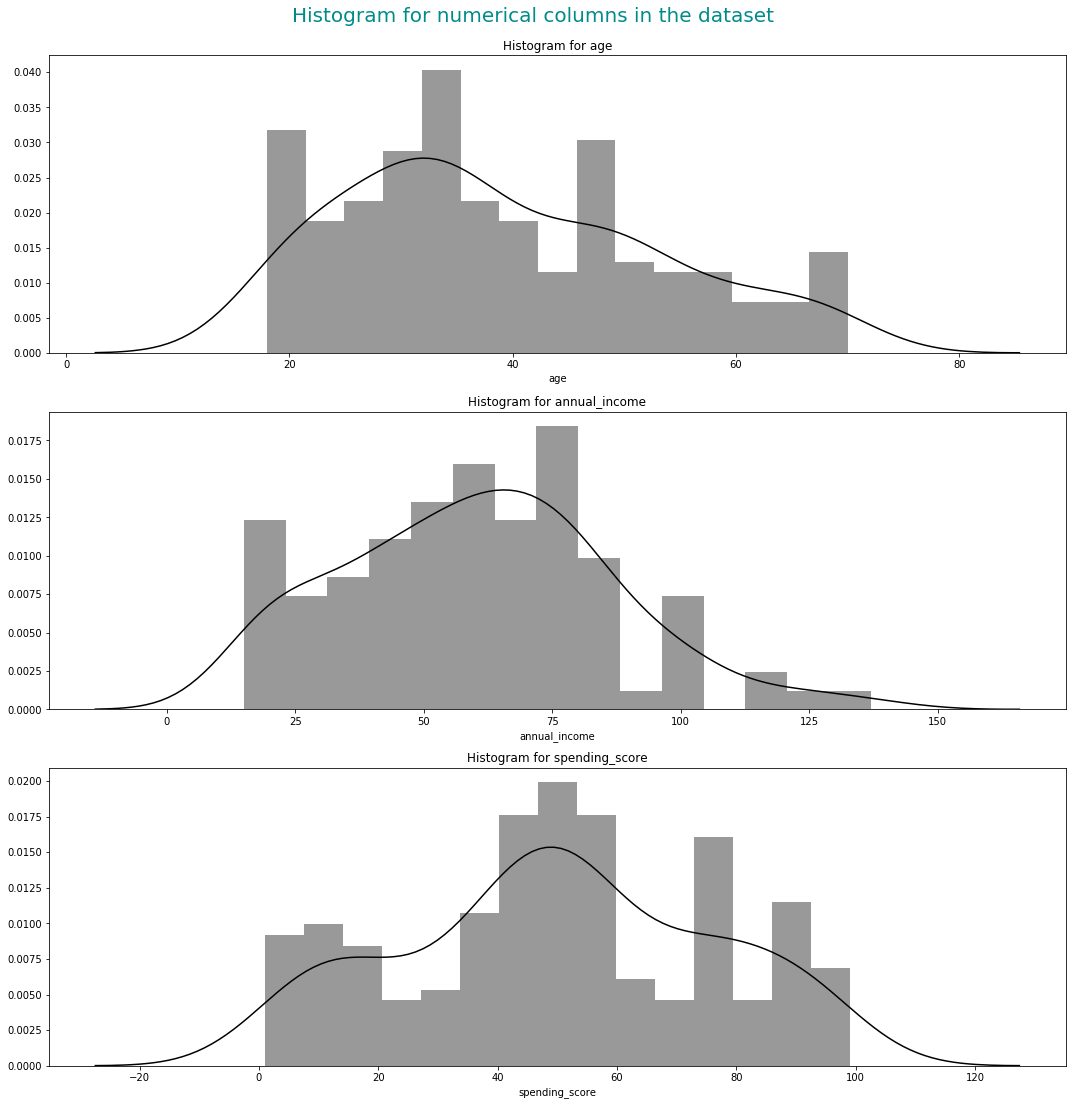

In [ ]:
# Plotting Histograms of the numerical columns in the data

# Figure specifications
fig, axes = plt.subplots(nrows = 3, ncols =1, figsize = (15,15))

# Labeling the title
fig.suptitle('Histogram for numerical columns in the dataset ', y = 1.02, color = 'darkcyan', fontsize = 20)

# Using a for loop to plot histograms for all numerical columns
for ax, data, name in zip(axes.flatten(),df, df[num_cols]):
  sns.distplot(df[name], ax = ax, color = 'black', bins = 15, fit_kws=3 )
  ax.set_title('Histogram for ' + name)
  # ax.set_facecolor(color)
  plt.tight_layout()

* The data is nearly normally distributed as seen from the kde plots.

### Pie Chart

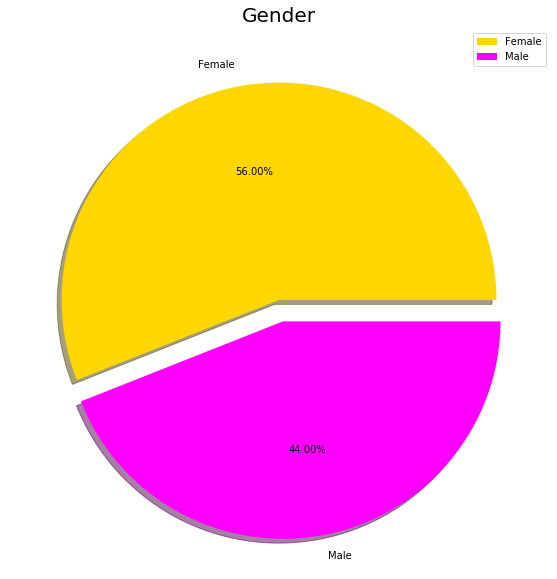

In [ ]:
# Plotting a pie chart of the gender 
# Using matplotlib library for visualizations

# Specifying labels, sizes, color and where the explosion should appear on the pie chart
# Chart specifications
# Labeling the title
# Displaying legend
# Displaying the chart
 

labels = ['Female', 'Male']
size = df['gender'].value_counts()
colors = ['gold', 'magenta']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

* There are slightly more females than male customers.

### Countplots

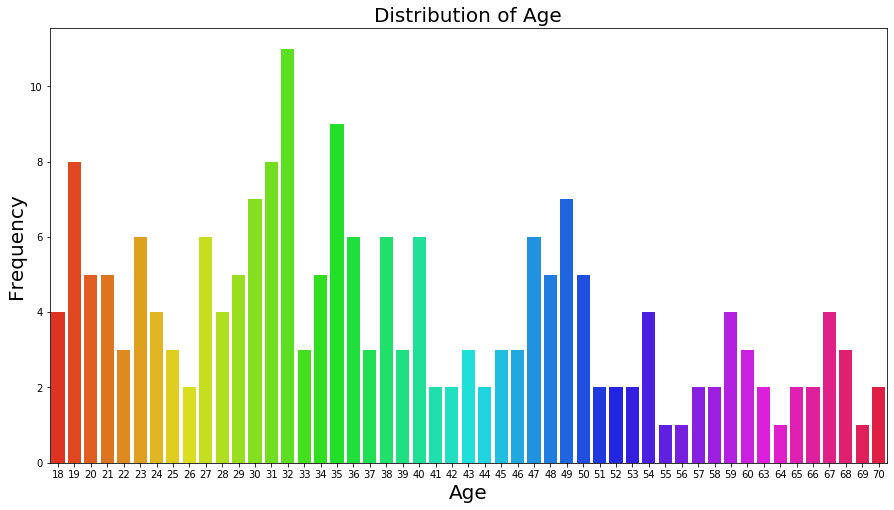

In [ ]:
# Countplot of the Age column
# Chart specifications
# Labeling the title, and respective axis
# Displaying the chart

plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.show()


* The age group between 27 to 40 years has a large number of customers.

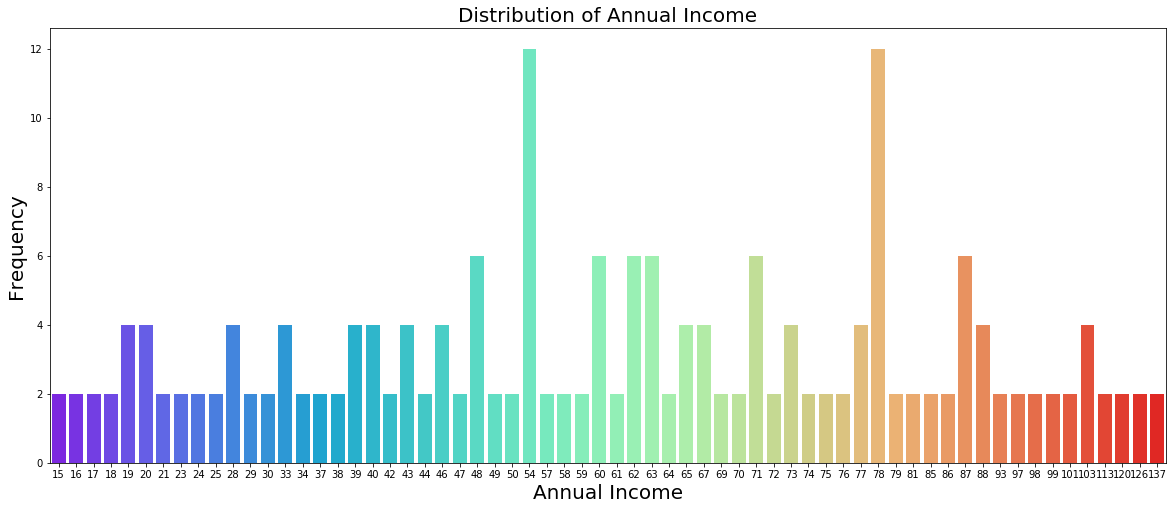

In [ ]:
# Countplot of the Annual Income column
# Chart specifications
# Labeling the title, and respective axis
# Displaying the chart

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['annual_income'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.show()


* In most cases, the customers earnings per year is uniformly distributed.
* However, there are a few cases where morer customers amounts such as at 54000 and 78000 dollars annually.

## 1.5.2 Bivariate analysis

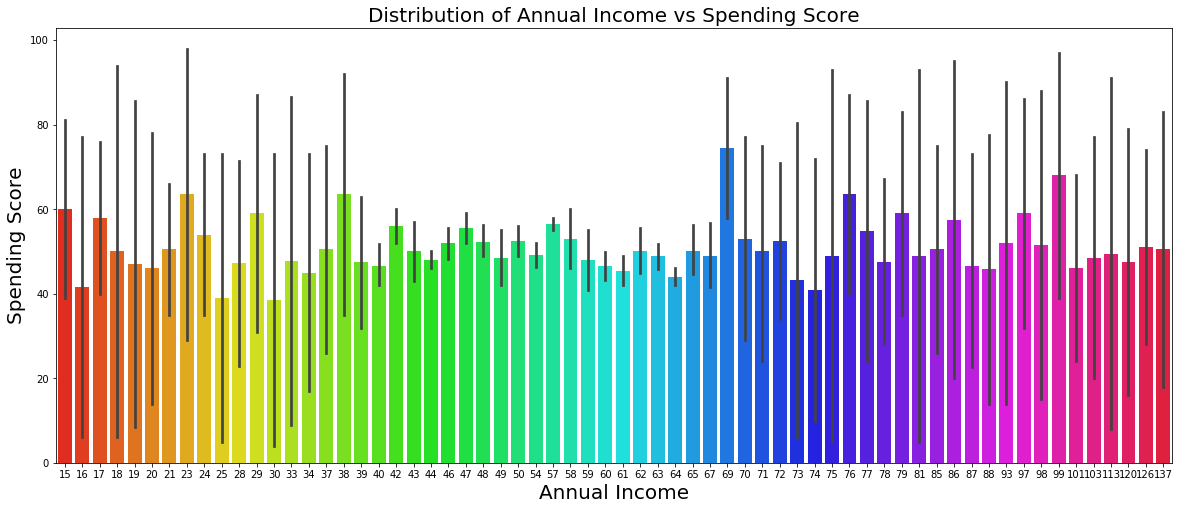

In [ ]:
# Comparing Annual Income vs Spending Scores
# Chart specifications
# Labeling the title, and respective axis
# Displaying the chart

plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(df.annual_income, df.spending_score, palette = 'hsv')
plt.title('Distribution of Annual Income vs Spending Score', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 20)
plt.show()

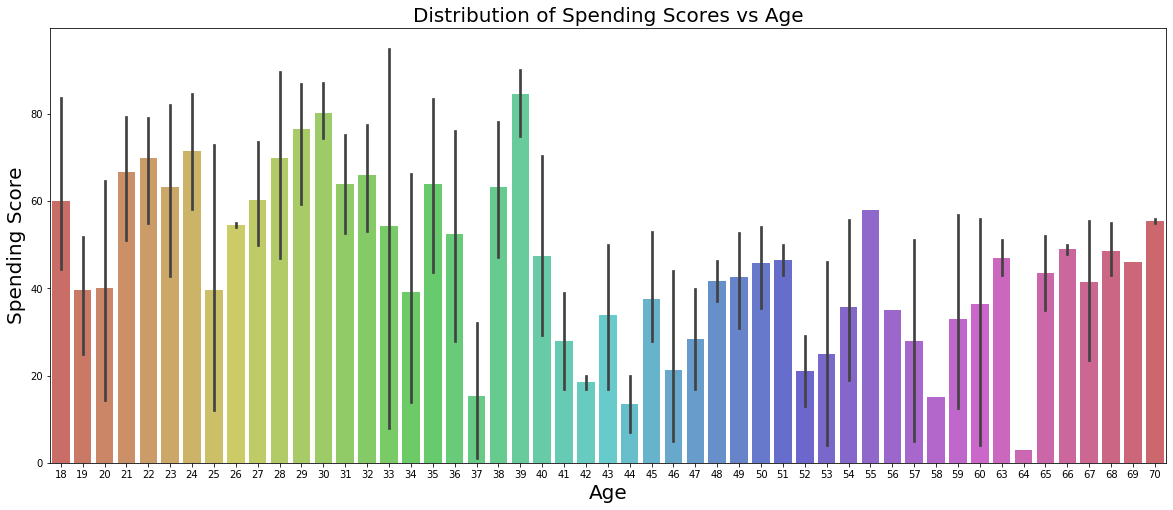

In [ ]:
# Comparing Spending Scores vs Age
# Chart specifications
# Labeling the title, and respective axis
# Displaying the chart

plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(df.age, df.spending_score, palette = 'hls')
plt.title('Distribution of Spending Scores vs Age', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 20)
plt.show()

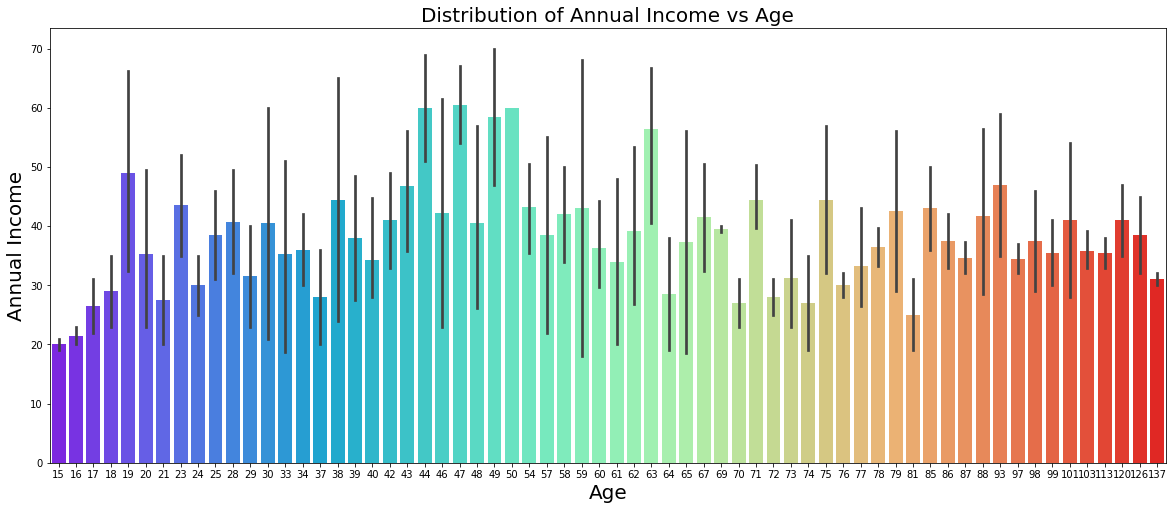

In [ ]:
# Comparing Annual Income vs Age
# Chart specifications
# Labeling the title, and respective axis
# Displaying the chart

plt.rcParams['figure.figsize'] = (20, 8)
sns.barplot(df.annual_income, df.age, palette = 'rainbow')
plt.title('Distribution of Annual Income vs Age', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Annual Income', fontsize = 20)
plt.show()


## 1.5.3 Multivariate Analysis

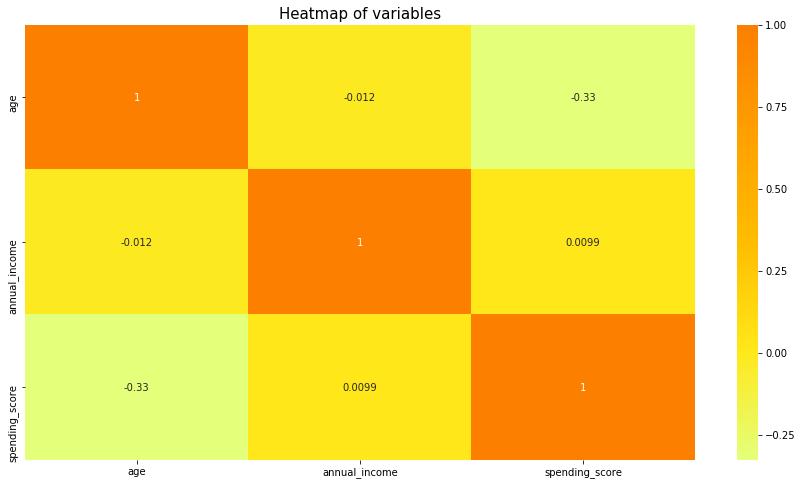

In [ ]:
# Heatmap of the features

plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap of Features', fontsize = 15)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 


* Most features are weakly correlated.

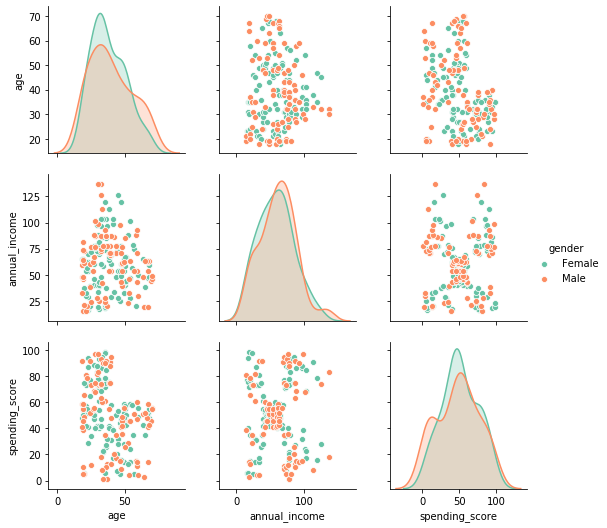

In [ ]:
# Plotting a pair plot to view the relationship between variables.
sns.pairplot(df, palette = 'Set2',hue='gender')
plt.show()

* From the plots, gender has no direct relation to segmenting customers. 
* Hence we will drop and use other features for clustering.

In [ ]:
# Dropping gender

df.drop('gender', axis = 1, inplace = True)

In [ ]:
# Confirming we have dropped gender.
df.columns

Index(['age', 'annual_income', 'spending_score'], dtype='object')

# 1.6 KMeans Clustering Algorithm

* We chose not to scale our data because we assumed that it was in acceptable range of values.

---


* One disadvantage of Kmeans is that, it is sensitive to scaling.

## KMeans Using Age and Spending Score Features

In [ ]:
# Initializing the two features: Age and Spending Score

A = df.iloc[:,[0,2]]

# Checking the shape

A.shape

(200, 2)

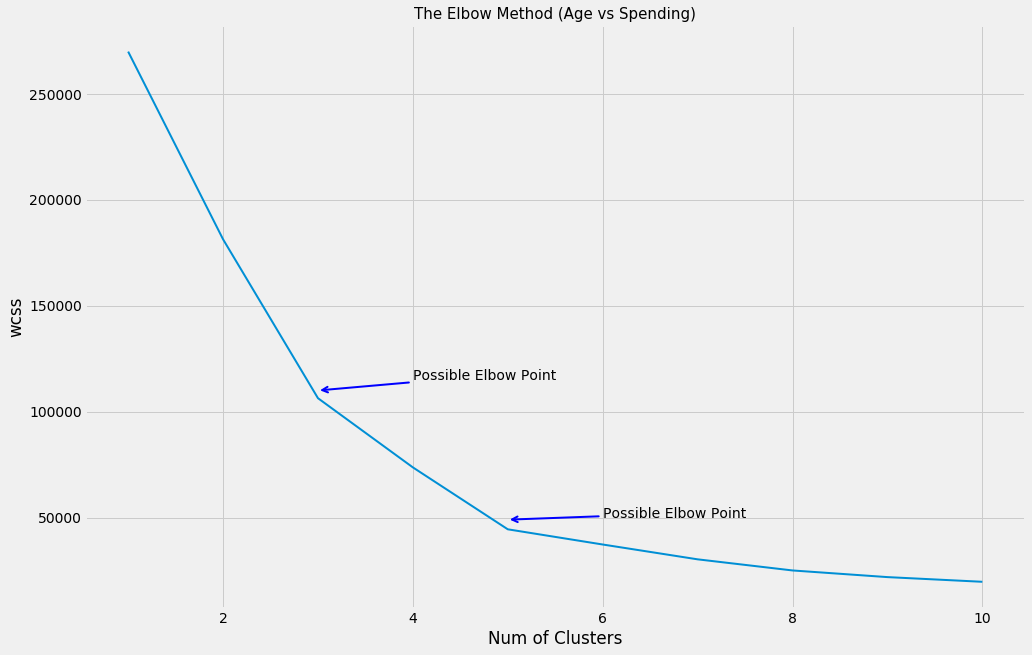

In [ ]:
# Finding optimal clusters.
# Creating an empty list to store the inertia values.
#(Sum of squared distances of samples to their closest cluster center).
# Iterating through the data to find the optimal number of clusters.

wcss = [] 

for q in range(1,11):
  km = KMeans(n_clusters = q, init = 'k-means++', max_iter = 300,
              n_init = 10, random_state = 10)
  
  km.fit(A)
  wcss.append(km.inertia_)
  
  
  # Plotting the elbow curve 
  
plt.figure(figsize = (15,10))
plt.plot(range(1,11),wcss, lw = 2)
plt.title('The Elbow Method (Age vs Spending)', fontsize = 15)
plt.xlabel('Num of Clusters')
plt.ylabel('wcss')


# Annotate arrow to show the possible Elbow points
plt.annotate('Possible Elbow Point', xy=(3, 110000), xytext=(4, 115000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('Possible Elbow Point', xy=(5, 49000), xytext=(6, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Displaying the chart
plt.show()

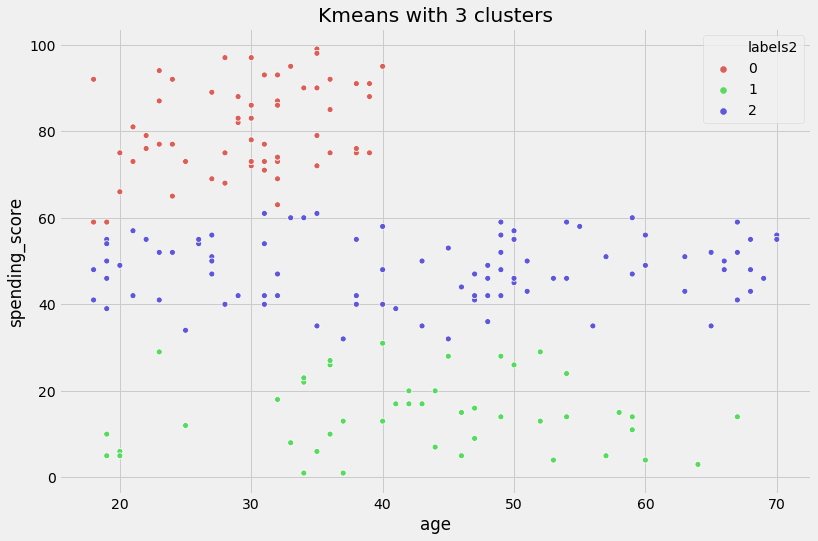

In [ ]:
# Using age and spending score with 3 clusters
# Computing k-means clustering 
# Visualizing the results

kmeans = KMeans(n_clusters=3,random_state=0).fit(A)

A['labels2'] = kmeans.labels_
  
plt.figure(figsize = (12,8))

sns.scatterplot(A['age'], A['spending_score'], hue = A['labels2'],
              palette = sns.color_palette('hls', 3))
plt.title('Kmeans with 3 clusters')  
plt.show()

* The plot shows 3 different groups by spending though it is not clear.
* We will use 5 clusters below.


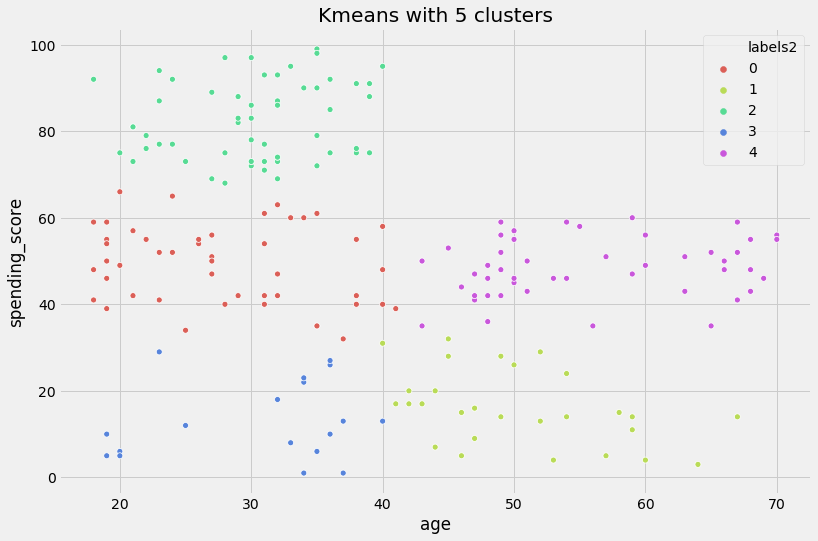

In [ ]:
# Using age and spending score with 5 clusters
# Computing k-means clustering 
# Visualizing the results

kmeans = KMeans(n_clusters=5,random_state=0).fit(A)

A['labels2'] = kmeans.labels_
  
plt.figure(figsize = (12,8))

sns.scatterplot(A['age'], A['spending_score'], hue = A['labels2'],
              palette = sns.color_palette('hls', 5))
plt.title('Kmeans with 5 clusters')  
plt.show()

In [ ]:
# Converting the two features to an array

A = A.values

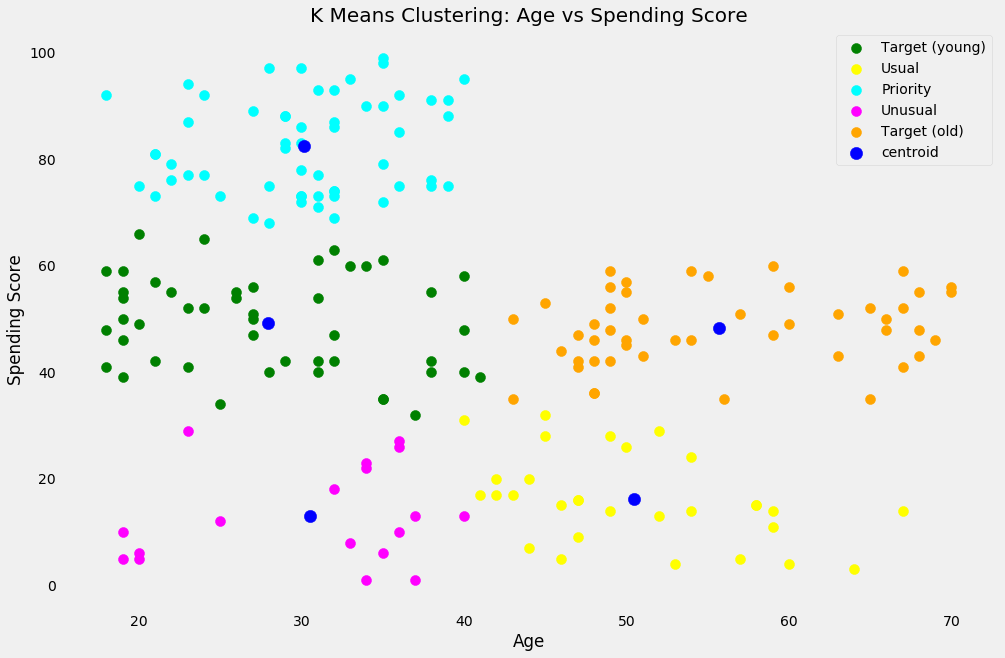

In [ ]:
# Using 5 clusters to segment the mall customers using Age and Spending.


km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(A)

plt.figure(figsize = (15,10))

plt.scatter(A[y_means == 0, 0], A[y_means == 0, 1], s = 100, c = 'green', label = 'Target (young)')
plt.scatter(A[y_means == 1, 0], A[y_means == 1, 1], s = 100, c = 'yellow', label = 'Usual')
plt.scatter(A[y_means == 2, 0], A[y_means == 2, 1], s = 100, c = 'cyan', label = 'Priority')
plt.scatter(A[y_means == 3, 0], A[y_means == 3, 1], s = 100, c = 'magenta', label = 'Unusual')
plt.scatter(A[y_means == 4, 0], A[y_means == 4, 1], s = 100, c = 'orange', label = 'Target (old)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'blue' , label = 'centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering: Age vs Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

* Green cluster: Target young customers
* Brown cluster: Target1 Old customers
* Cyan cluster: Priority for Retention; young
* Yellow clusters: Target2 old customers
* Purple cluster; usual, young low spending.

## KMeans Using Income and Spending Score Features.

In [ ]:
# Creating a df of Income and Spending Scores

Z = df.iloc[:, [1,2]]
Z.columns

Index(['annual_income', 'spending_score'], dtype='object')

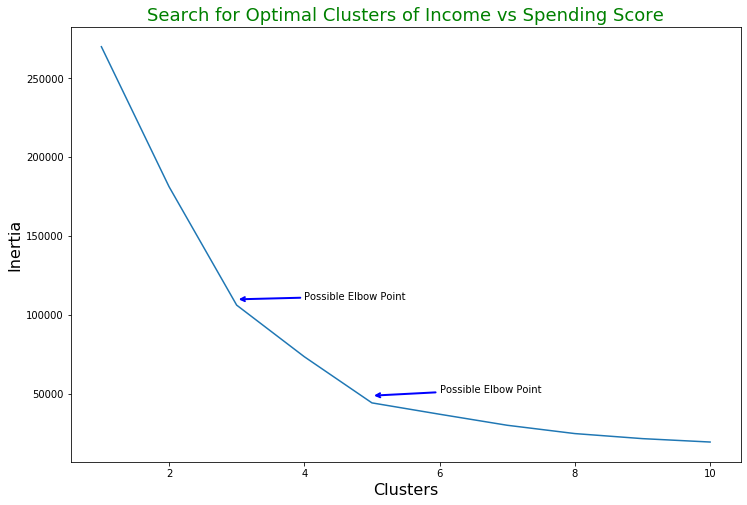

In [ ]:
# Creating the elbow curve inorder to get most optimal clusters

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Z)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Search for Optimal Clusters of Income vs Spending Score',fontsize=18,color='green')
ax.set_xlabel('Clusters',fontsize=16)
ax.set_ylabel('Inertia',fontsize=16)

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 110000), xytext=(4, 110000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible Elbow Point', xy=(5, 49000), xytext=(6, 51000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

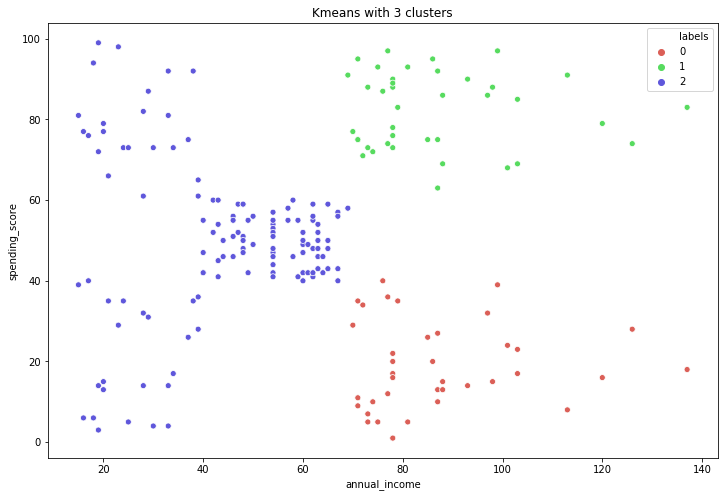

In [ ]:
# Now using kmeans using the 3 clusters

kmeans = KMeans(n_clusters=3,random_state=0).fit(Z)

Z['labels'] = kmeans.labels_
  
plt.figure(figsize = (12,8))

sns.scatterplot(Z['annual_income'], Z['spending_score'], hue = Z['labels'],
              palette = sns.color_palette('hls', 3))
plt.title('Kmeans with 3 clusters')  
plt.show()

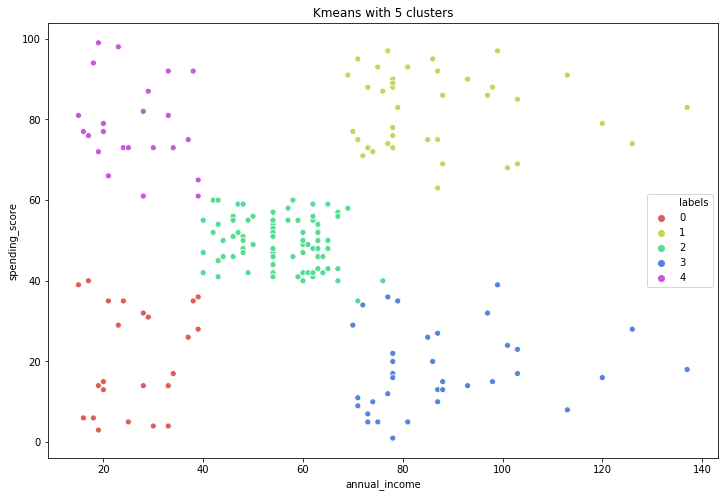

In [ ]:
# Now using kmeans using 5 clusters

kmeans = KMeans(n_clusters=5,random_state=0).fit(Z)

Z['labels'] = kmeans.labels_
  
plt.figure(figsize = (12,8))

sns.scatterplot(Z['annual_income'], Z['spending_score'], hue = Z['labels'],
              palette = sns.color_palette('hls', 5))
plt.title('Kmeans with 5 clusters')  
plt.show()

* From the above plots, it is evident that 5 clusters are most optimal in segmenting the mall customers.

In [ ]:
# Creating an array of the features for prediction

Z = Z.values

Z.shape

(200, 2)

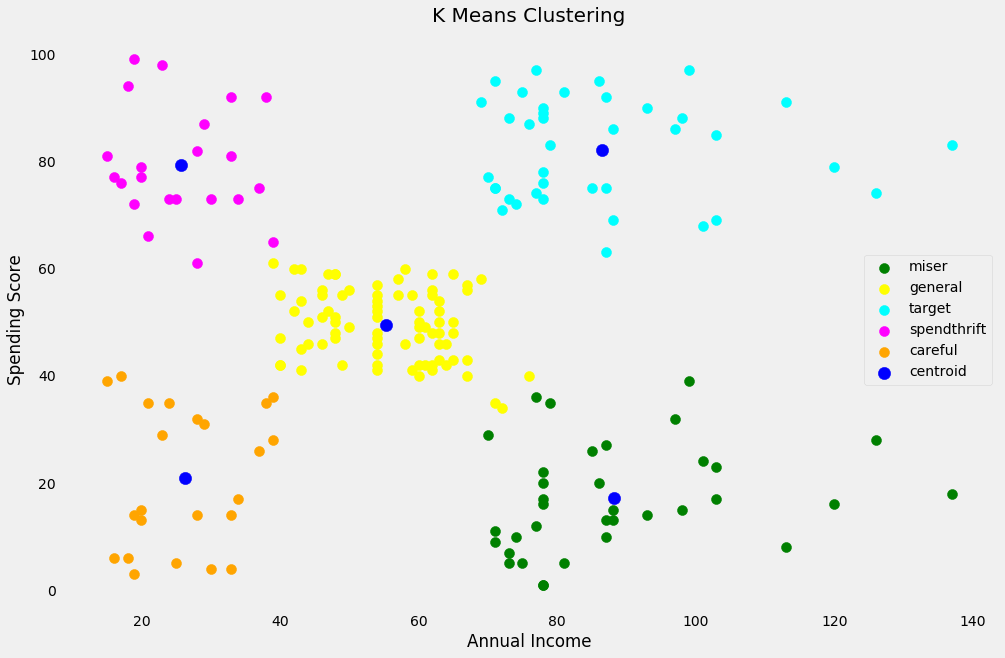

In [ ]:
# Using 5 clusters to segment the mall customers.

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Z)

plt.figure(figsize = (15,10))

plt.scatter(Z[y_means == 0, 0], Z[y_means == 0, 1], s = 100, c = 'green', label = 'miser')
plt.scatter(Z[y_means == 1, 0], Z[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(Z[y_means == 2, 0], Z[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(Z[y_means == 3, 0], Z[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(Z[y_means == 4, 0], Z[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'blue' , label = 'centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

* Based on annual income and Spending score, there are 5 clusters of customers:

  * Miser: Green cluster; high income low spending score; TARGET
  * General:yellow cluster; target customers to increase spending score; TARGET
  * Target: cyan cluster; priority we want to retain them, high income high spending
  * Spendthrift: purple cluster; low income high spending; RETENTION
  * Careful: brown cluster: low income low spending

# 1.7 Hierachical Clustering

In [ ]:
df.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
X = df.copy()

In [ ]:
X.columns

Index(['age', 'annual_income', 'spending_score'], dtype='object')

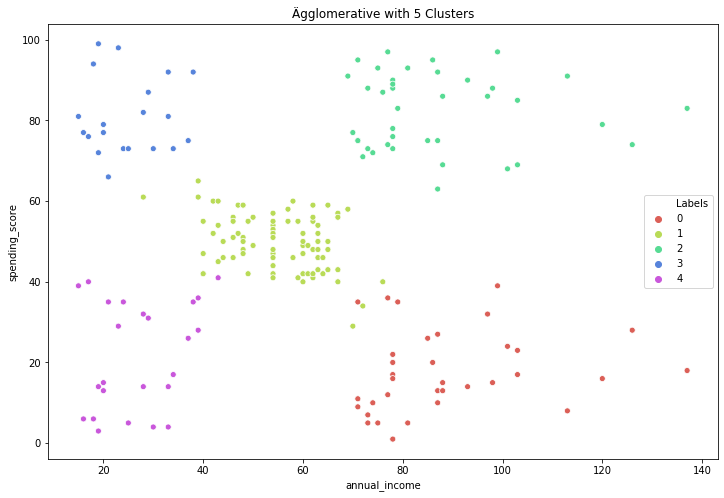

In [ ]:
# 
ag = AgglomerativeClustering(n_clusters = 5, linkage= 'average').fit(X)

X['Labels'] = ag.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['annual_income'],X['spending_score'],hue=X['Labels'],
                   palette=sns.color_palette('hls',5))
plt.title("Ägglomerative with 5 Clusters")
plt.show()

In [ ]:
dist = distance_matrix(X,X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


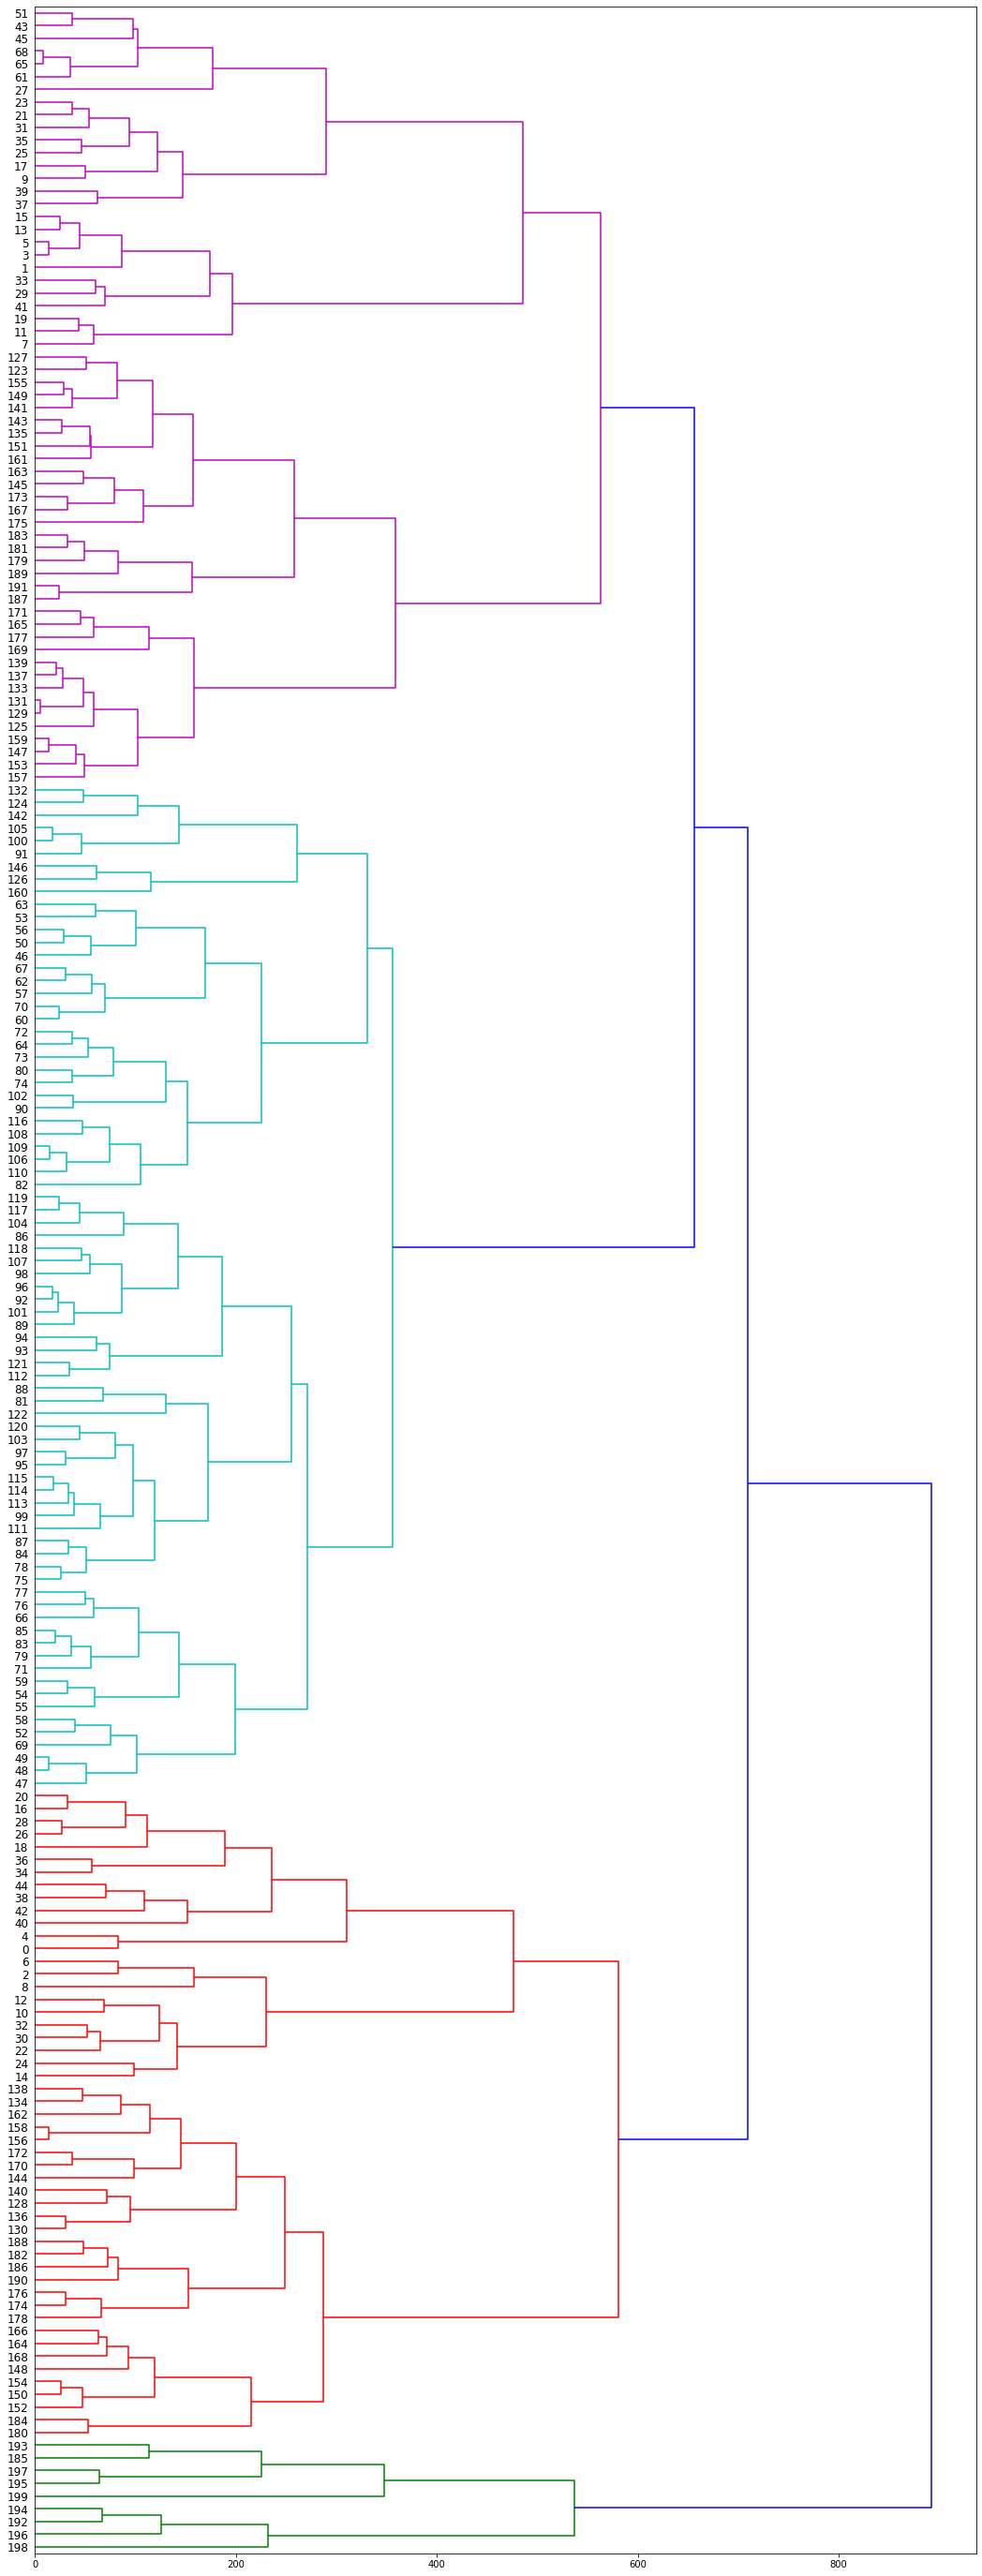

In [ ]:
D = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18,50))
dend = hierarchy.dendrogram(D,leaf_rotation=0,leaf_font_size=12,orientation='right')


We used complete linkage, let's change it to average linkage to see how the dendogram changes.

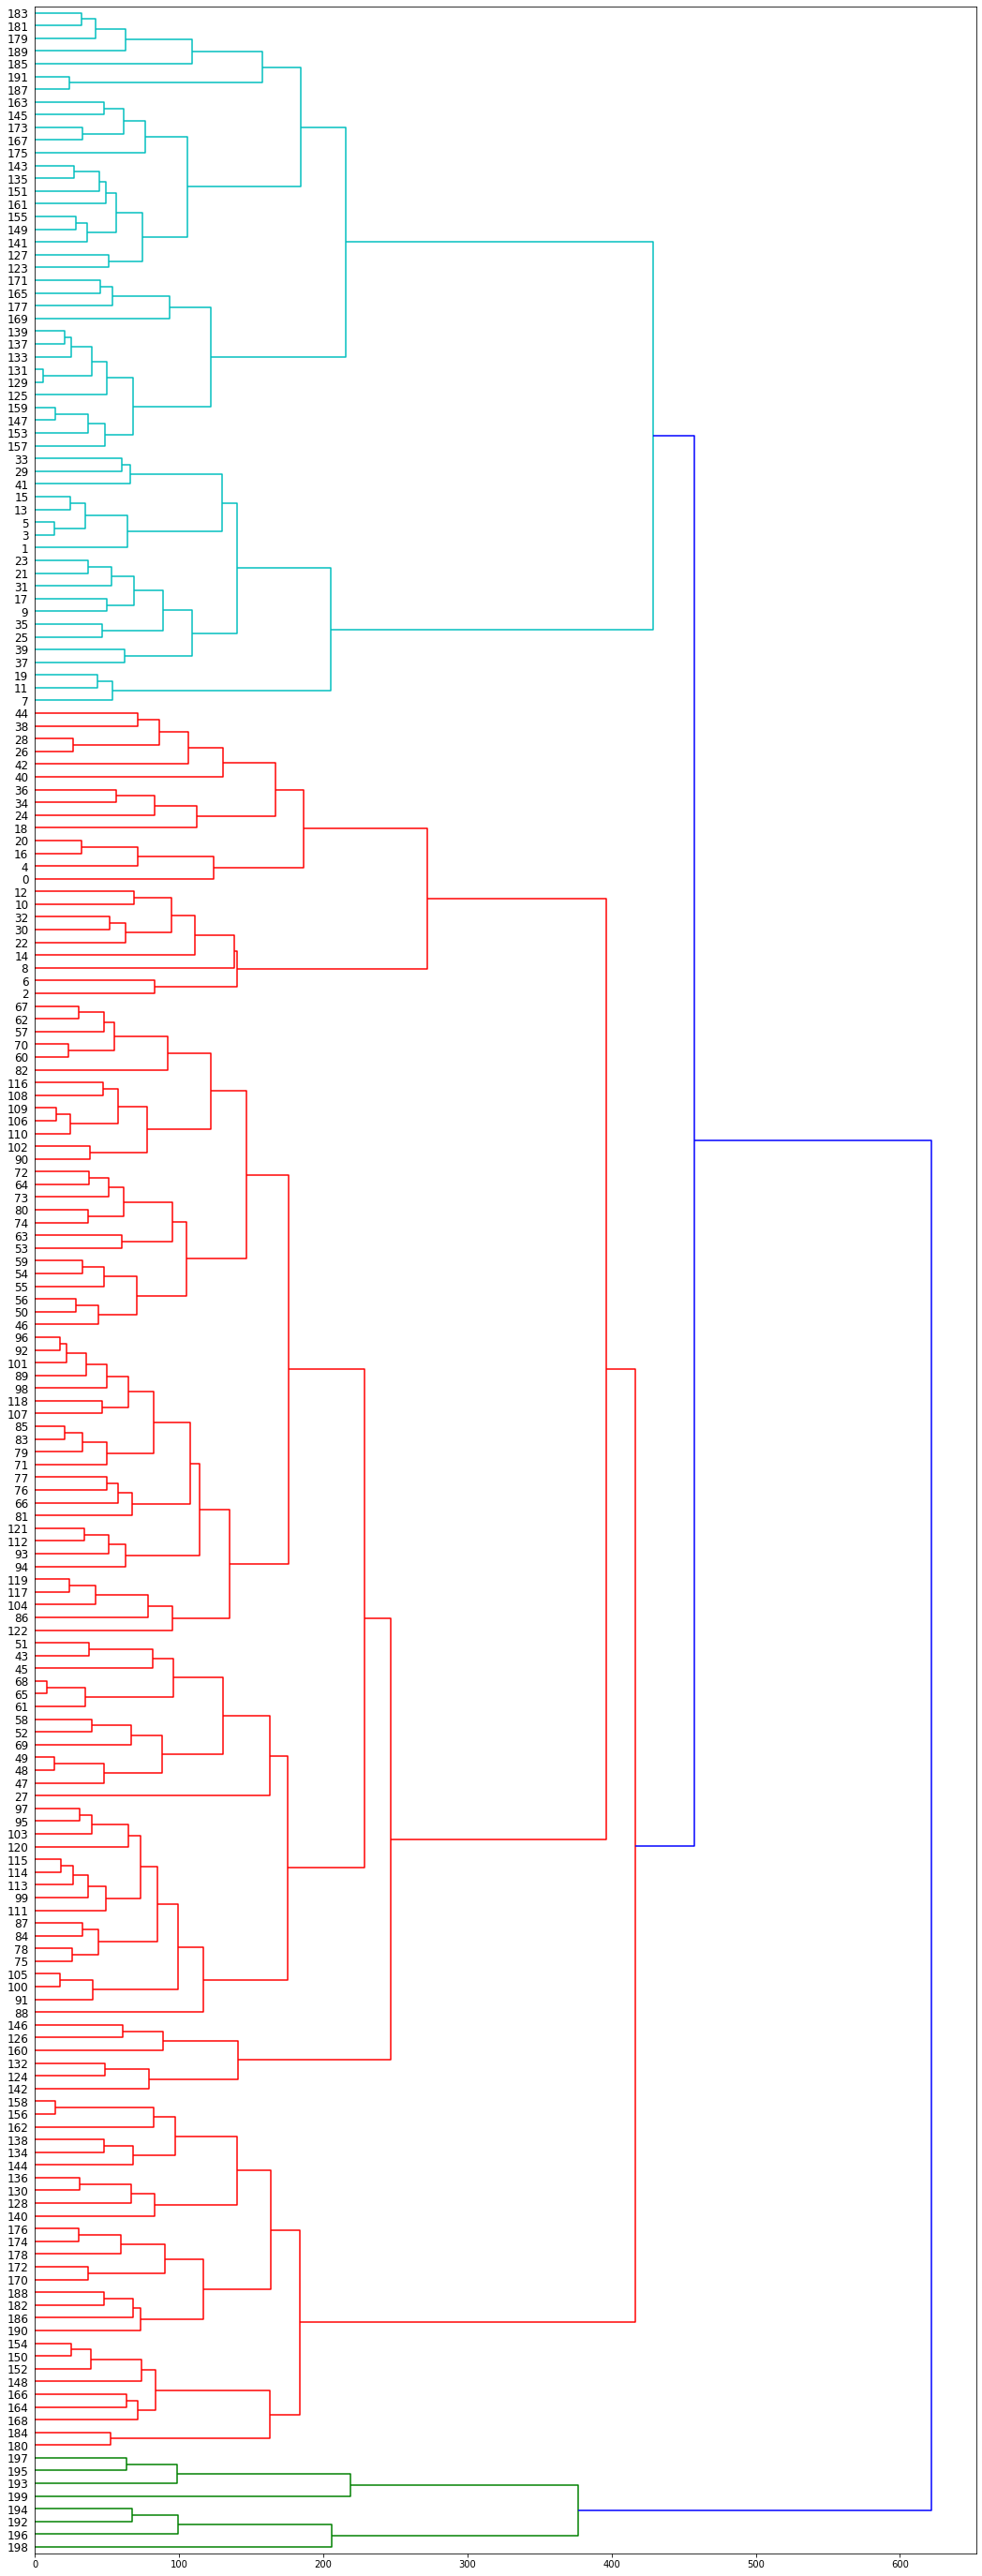

In [ ]:
DA = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18,50))
dend = hierarchy.dendrogram(DA,leaf_rotation=0,leaf_font_size=12,orientation='right')


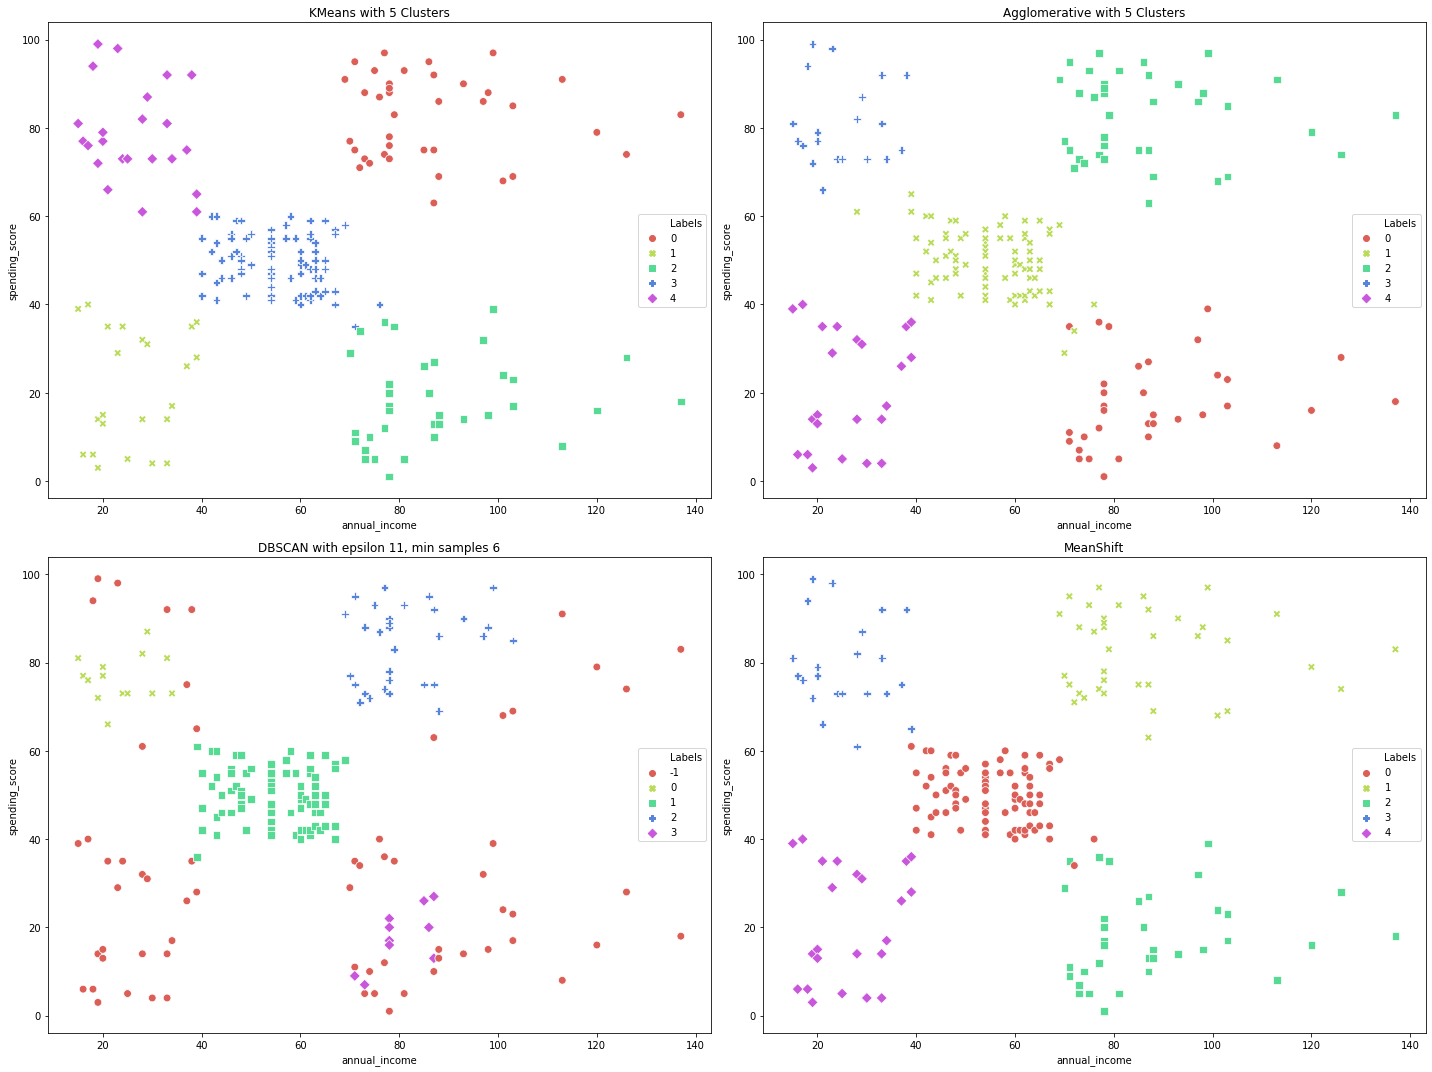

In [ ]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()

# 1.8 Conclusion
 
 * Both KMeans and Hierachical are optimal for clustering the customers.
 * Mostly because the data was small.
 * The optimal number of clusters was 5 using Annual Income and Spending Score as the main features.
 * Also, we grouped the customers using the Spending score and Age using 5 clusters.
 * These clusters will be very benefical to the marketing team while creating marketing strategies.
 